In [5]:
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

large = 22; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 7),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,""
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

In [10]:
%%script False 
with open('all_idioms.json', 'r', encoding='UTF-8') as f:
    data = tuple(json.load(f))

Couldn't find program: 'False'


In [44]:
abbrs = {'презрит', 'эвф', 'груб', 'шутл-ирон', 'инф', 'ит', 'вульг', 'грубо-прост', 'канц', 'фр', 'мор', 'бран', 'поэт', 'устар', 'неодобрит', 'высок', 'одобр', 'шутл-фамильярн', 'этногр', 'ритор', 'книжн', 'восторж', 'этикет ф', 'посл', 'прост', 'библ', 'жарг', 'обл', 'шахм', 'офиц', 'миф', 'погов', 'юр', 'лит', 'доревол', 'перен', 'нов', 'фольк', 'спец', 'предосуд', 'еванг', 'лат', 'публиц', 'торж', 'греч', 'греч миф', 'спорт', 'англ', 'араб', 'ист', 'воен', 'др-греч', 'уничиж', 'пренебр', 'нем', 'пориц', 'разг', 'фам', 'экспрес', 'физ', 'театр', 'народно-поэт', 'церк-слав', 'охот', 'детск', 'иpoн', 'церк', 'шутл', 'филос', 'рел'}
len(abbrs)

70

In [45]:
abbrs = sorted(list(abbrs))

In [4]:
%%script false 
df = pd.DataFrame(columns=['phrase', 'meaning', 'dictionary'] + sorted(list(abbrs)))
for phrase_dict in data:
    semantics_set = phrase_dict['semantics']
    for meaning_dict in semantics_set:
        if 'abbr' in list(meaning_dict.keys()) and 'dictionary' in list(meaning_dict.keys()):
            df.loc[len(df)] = [phrase_dict['phrase'],
                               meaning_dict['meaning'],
                               meaning_dict['dictionary']] + [True if abbr in meaning_dict['abbr'] else False for abbr in abbrs]

In [5]:
df.head(10)

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,церк-слав,шахм,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр
0,"[а вот на тебе!, и вот на тебе!]","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,[а был ли мальчик?],"Было ли что-либо в действительности, на самом ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,[а был ли мальчик?],"выражение сомнения в том, что что-то произошл...",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,[а вот],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"[а вот и нет, вот и нет]","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,[а ларчик просто открывался (открывается)],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"[а не то, не то]","Иначе, в противном случае.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"[а не то, не то]","Либо, или же.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"[а не то, не то]","в противном случае, иначе",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,"[а поди ж ты, поди ж ты]","Выражение изумления, восхищения, недоумения и ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# распределение фраз по количеству помет
#create a column with a tuple of all idiom's labels
%% script false
row_labels = []
label_combinations = []
for ind, row in df.loc[:, 'англ': 'юр'].iterrows():
    row_labels.append(len(row[row].index))
    label_combinations.append(tuple(row[row].index))

df['label_counts'] = row_labels
df['label_combinations'] = label_combinations

In [8]:
%% script false
df.to_csv('dataframe.csv', sep=',', encoding='utf-8')

In [11]:
df_default = pd.read_csv('dataframe.csv', sep=',')

In [12]:
del df_default['Unnamed: 0']

In [32]:
phrase_one = [p for p in df_default['phrase'] if len(df_default[df_default['phrase'] == p]) == 1]
df = df_default[df_default['phrase'].isin(phrase_one)]

In [36]:
len(df)

14759

In [37]:
description = df.describe()
description

,label_counts
count,14759.000000
mean,0.962599
std,0.830431
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [38]:
df

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
0,"['а вот на тебе!', 'и вот на тебе!']","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
3,['а вот'],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
4,"['а вот и нет', 'вот и нет']","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
5,['а ларчик просто открывался (открывается)'],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('иpoн',)"
9,"['а поди ж ты', 'поди ж ты']","Выражение изумления, восхищения, недоумения и ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('прост', 'экспрес')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32740,['Сорвалось с языка'],"неожиданно, вдруг стать сказанным, произнесенн...",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
32741,['Тянуть или дёргать за язык'],"заставлять говорить, высказываться.",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
32742,['Хорошо привешенный или подвешенный языку кого'],"о человеке, к-рый бойко, плавно, хорошо говорит.",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
32743,['Язык не повернётся сказать'],нет решимости сказать.,Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()


In [39]:
pd.crosstab(df['phrase'], df['dictionary']).sum()

dictionary
Fedorov        5703
Fedosov        3399
Kveselevich    3513
Myurrey         288
Volkova        1856
dtype: int64

<AxesSubplot:title={'center':'Объем словарей'}>

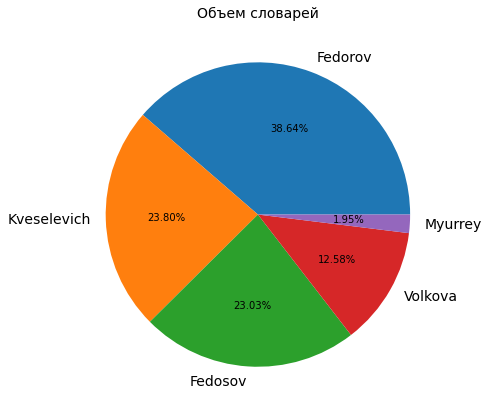

In [40]:
# Количество помет в каждом из словарей
def autopct(pct): 
    return '%.2f' % pct + '%'


pd.crosstab(df['phrase'], df['dictionary']).sum().sort_values(ascending=False).plot(kind='pie',
                                                       rot=0,
                                                      title='Объем словарей',
                                                      ylabel='',
                                                      autopct=autopct)

In [41]:
num_labels = df[df['label_counts'] != 0]
num_labels

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
0,"['а вот на тебе!', 'и вот на тебе!']","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
3,['а вот'],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
4,"['а вот и нет', 'вот и нет']","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
5,['а ларчик просто открывался (открывается)'],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('иpoн',)"
9,"['а поди ж ты', 'поди ж ты']","Выражение изумления, восхищения, недоумения и ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('прост', 'экспрес')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32736,"['Нашего (одного, своего) поля ягода']",сходный с кем-н. или подходящий для кого-н. че...,Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,"('разг', 'фам')"
32737,['Высуня язык (бежать)'],"стремительно, не переводя дыханья.",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('прост',)"
32740,['Сорвалось с языка'],"неожиданно, вдруг стать сказанным, произнесенн...",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
32741,['Тянуть или дёргать за язык'],"заставлять говорить, высказываться.",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"


In [54]:
# количество каждой из помет
labels_count = {}
for col in abbrs:
    if len(df[df[col]==True]) > 350:
        labels_count[len(df[df[col]==True])] = col
        print(col, len(df[df[col]==True]))

иpoн 542
книжн 504
неодобрит 363
прост 2807
разг 2993
устар 2130
экспрес 2233


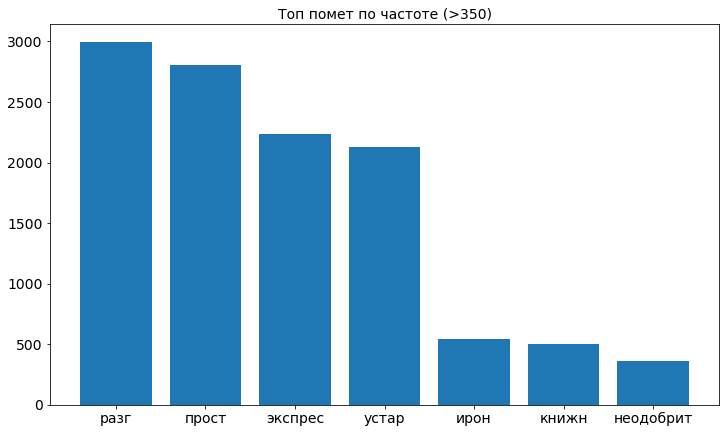

In [55]:
#plt.figure(figsize=(10, 7))

labels_count_keys = sorted(list(labels_count.keys()), reverse=True)
labels_count_values = [labels_count[k] for k in labels_count_keys]

plt.bar(labels_count_values, labels_count_keys)
plt.title('Топ помет по частоте (>350)')
plt.show()

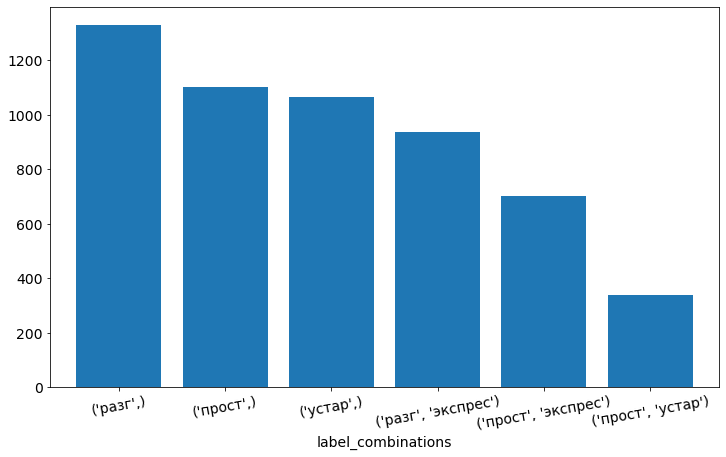

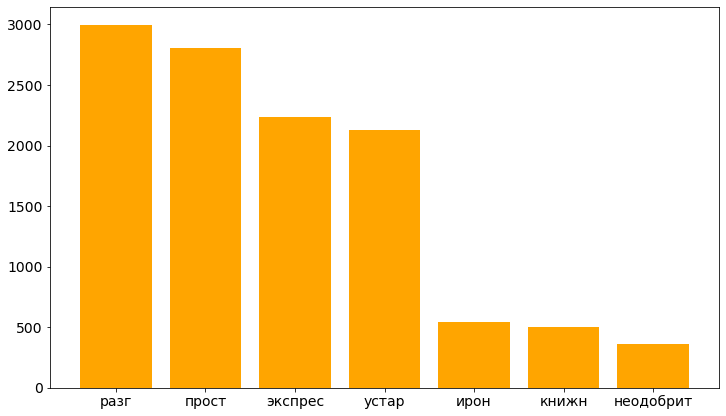

In [56]:
pd.crosstab(df['dictionary'], df['label_combinations']).sum().nlargest(7, keep='all')[1:].plot(kind='bar',
                                                                                            rot=10,
                                                                                            figsize=(12, 7),
                                                                                             width=0.8)
plt.show()

plt.bar(labels_count_values, labels_count_keys, color='orange')
plt.show()

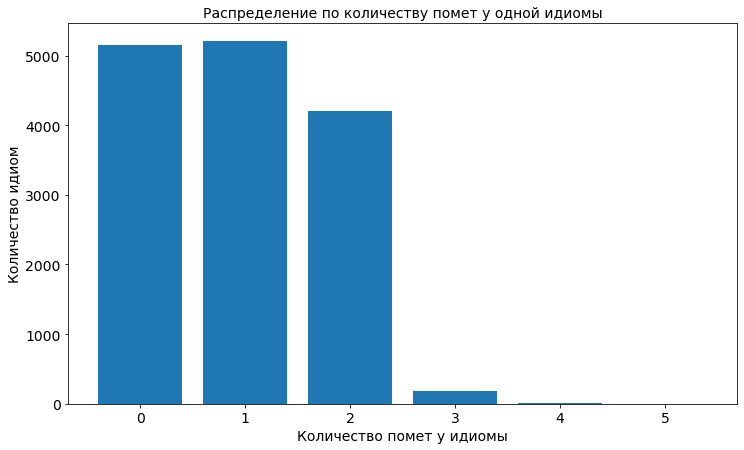

In [60]:
unique_label_counts = list(set(df['label_counts']))
row_labels = list(df['label_counts'])
plt.bar(unique_label_counts, [row_labels.count(label_count) for label_count in unique_label_counts])
plt.xlabel('Количество помет у идиомы')
plt.ylabel('Количество идиом')
plt.title('Распределение по количеству помет у одной идиомы')
plt.show()

In [65]:
unique_label_counts, [row_labels.count(label_count) for label_count in unique_label_counts]

([0, 1, 2, 3, 4, 5], [5156, 5203, 4210, 177, 12, 1])

In [61]:
df[df['label_counts'] == 5]

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
29693,['яко тать в нощи'],NaN,Kveselevich,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,5,"('библ', 'иpoн', 'устар', 'церк', 'церк-слав')"


In [62]:
dicts = df['dictionary'].unique()

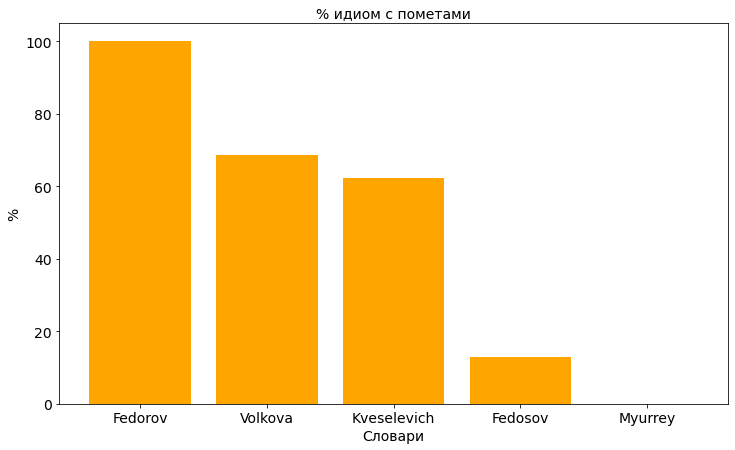

In [63]:
by_dictionary = df.groupby('dictionary')
labels_percent = {}
for dictionary in dicts:
    dict_group = by_dictionary.get_group(dictionary)
    total = len(dict_group)
    with_labels = len(dict_group['label_counts'][dict_group['label_counts'] > 0])
    
    labels_percent[round(with_labels / total * 100, 3)] = dictionary
    
labels_percent_keys = sorted(list(labels_percent.keys()), reverse=True)
labels_percent_values = [labels_percent[k] for k in labels_percent_keys]

plt.bar(labels_percent_values, labels_percent_keys, color='orange')
plt.xlabel('Словари')
plt.ylabel('%')
plt.title('% идиом с пометами')

plt.show()

In [64]:
dicts_group = df.groupby('dictionary').apply(lambda x: sum(x['label_counts']) / len (x))
print('Среднее количество помет на одну идиому по словарям')
print(dicts_group)

Среднее количество помет на одну идиому по словарям
dictionary
Fedorov        1.591794
Fedosov        0.137982
Kveselevich    0.825221
Myurrey        0.000000
Volkova        0.948815
dtype: float64
